In [2]:
# Importing the related packages
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [3]:
# Connect to the database
con = sqlite3.connect('attr_data.db') 

# Run SQL          
cur = con.cursor()         
cur.execute('''SELECT * FROM attrition_records''') 

# Convert SQL to DataFrame
df = pd.DataFrame(cur.fetchall(), columns = ['id', 'Age', 'Attrition','BusinessTravel','DailyRate','Department','DistanceFromHome','Education','EducationField','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','Gender','HourlyRate','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome','MonthlyRate','NumCompaniesWorked','Over18','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'])

In [4]:
df.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# Checking the shape and count of the row and column
df.shape

(1470, 36)

In [7]:
# Looking through the summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [8]:
# Checking the columns for inconsistencies
df.columns
# The columns look okay

Index(['id', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
# Identifying and treating missing values
df.isnull().any().any()
# There are no missing value

False

In [10]:
# Checking for duplicates
df.duplicated().any()
# There are no duplicates

False

In [11]:
# Checking and confirming datatype. 
df.dtypes
# No wrong data type

id                           int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel    

In [12]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [13]:
df.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [14]:
df.corr()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
id,1.000000,-0.010349,-0.051484,0.032928,0.041901,NaN,0.999906,0.017424,0.034754,-0.007105,...,-0.069654,NaN,0.062452,-0.014095,0.023907,0.010740,-0.011557,-0.008853,-0.009151,-0.009432
Age,-0.010349,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,-0.051484,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,0.032928,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.041901,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,0.999906,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.017424,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.034754,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,-0.007105,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


### 1. What do you think are the 3 factors behind employee attrition?

In [15]:
# Data Visualizing
# Analyzing various features

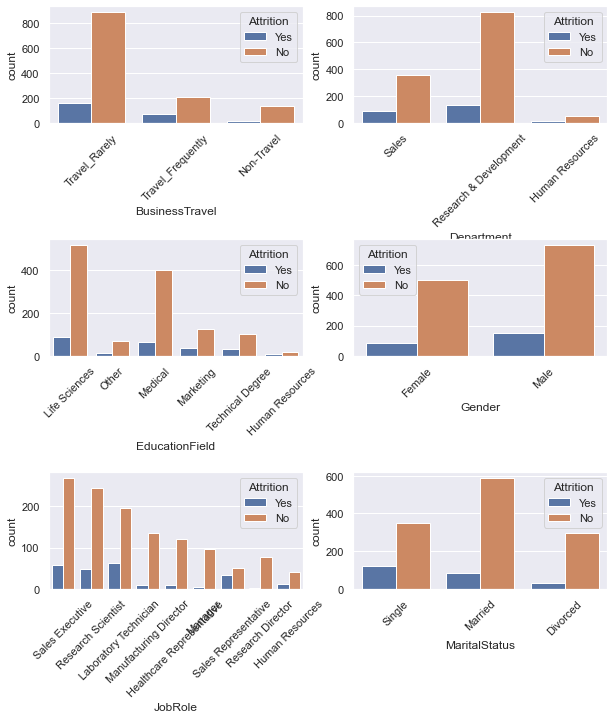

In [16]:
ftr=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(ftr):
    plt.subplot(4,2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    plt.xticks(rotation=45)
    sns.countplot(x=j,data = df, hue='Attrition')

In [17]:
bins=np.linspace(min(df['MonthlyIncome']),max(df['MonthlyIncome']), 4)
group_name=['Low','Medium','High']
df['Income_binned']=pd.cut(df['MonthlyIncome'],bins,labels=group_name,include_lowest=True)

In [18]:
df['Income_binned']

0          Low
1          Low
2          Low
3          Low
4          Low
         ...  
1465       Low
1466    Medium
1467       Low
1468       Low
1469       Low
Name: Income_binned, Length: 1470, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

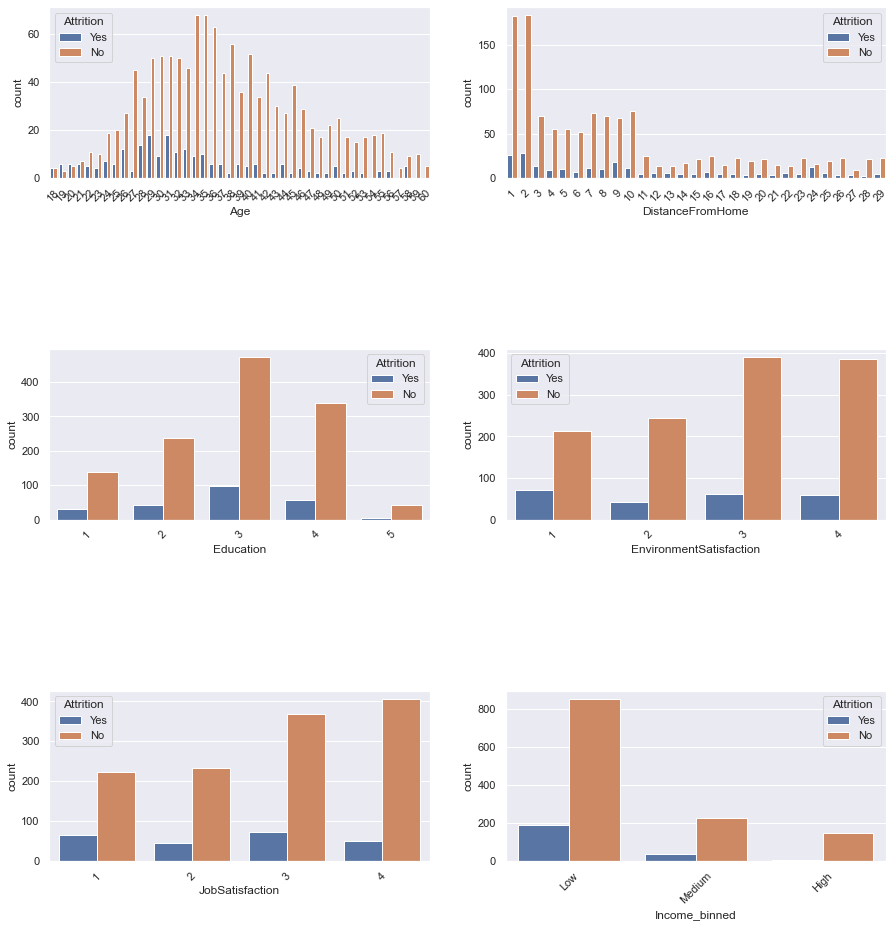

In [19]:
ftr=['Age','DistanceFromHome','Education','EnvironmentSatisfaction','JobSatisfaction','Income_binned']
fig=plt.subplots(figsize=(15,22))
for i, j in enumerate(ftr):
    plt.subplot(4,2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    plt.xticks(rotation=45)
    sns.countplot(x=j,data = df, hue='Attrition')

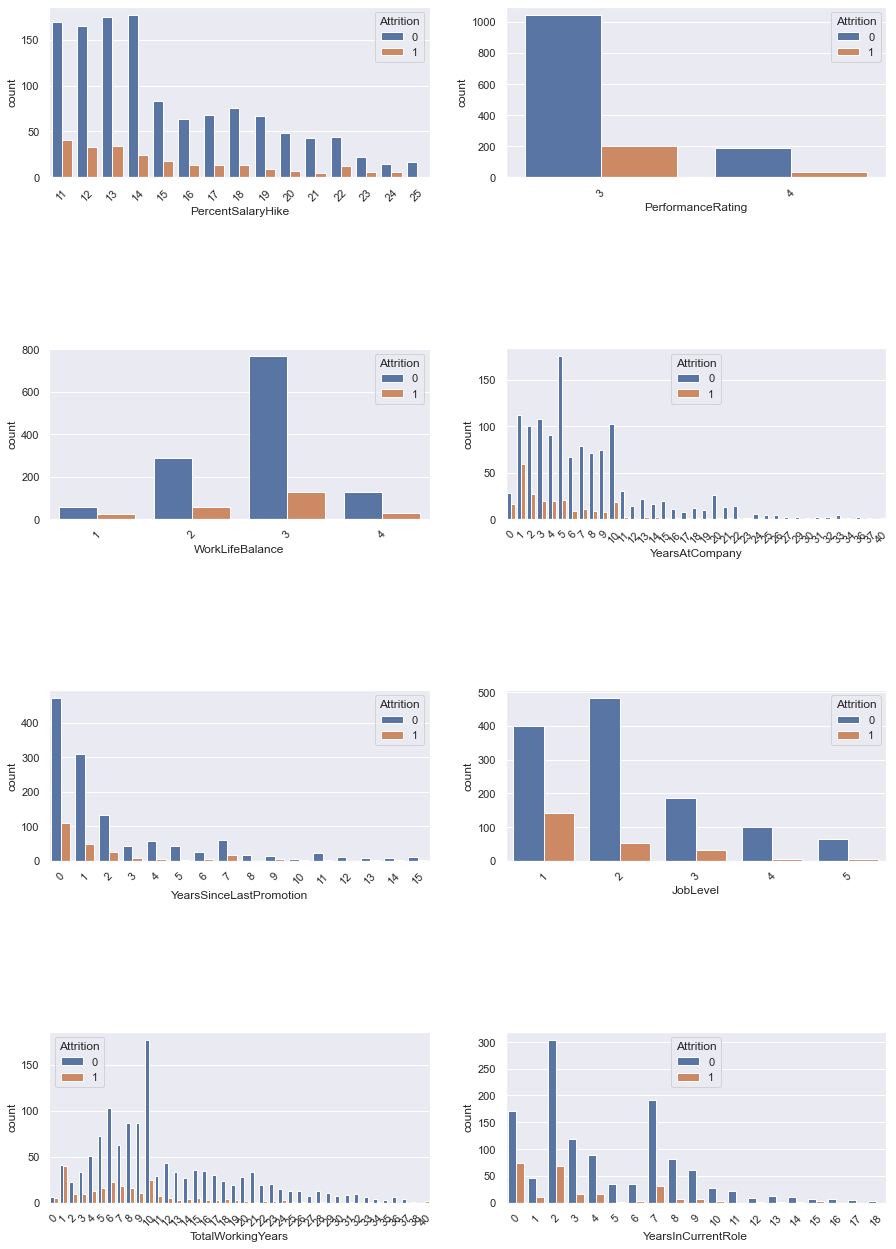

In [23]:
ftr=['PercentSalaryHike','PerformanceRating','WorkLifeBalance','YearsAtCompany','YearsSinceLastPromotion','JobLevel','TotalWorkingYears','YearsInCurrentRole']
fig=plt.subplots(figsize=(15,22))
for i, j in enumerate(ftr):
    plt.subplot(4,2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    plt.xticks(rotation=45)
    sns.countplot(x=j,data = df, hue='Attrition')

In [34]:
df['Attrition'].replace(['Yes','No'],[1,0], inplace=True)

<AxesSubplot:>

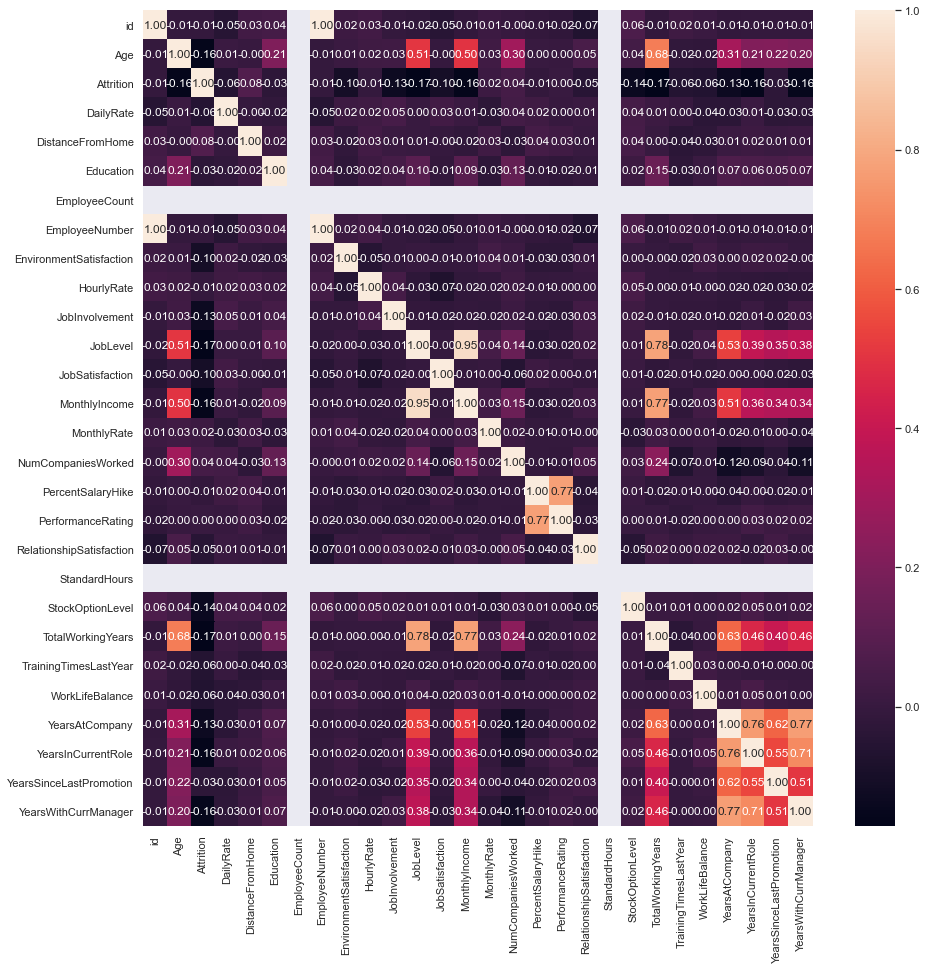

In [35]:
df_c = df.select_dtypes('int64')
plt.figure(figsize=(15,15))
sns.heatmap(df_c.corr(), annot = True, fmt = '.2f')

From the above plots and corr diagram above, Age, MonthlyIncome, JobLevel,TotalWorkingYears and YearsInCurrentRole are all factors behind employee attrition

#### Age: Younger people tend to churn way more than older employees.
#### MonthlyIncome: Employees with higher income tend not to churn.
#### JobLevel: Less experienced employees comprise of a higher proportion of employees leaving the company.
#### TotalWorkingYears: Employees that churn comprise of people with little working years
#### YearsAtCompany: Again employees with little or no experience in the company tend to churn.

## 2. What is the relationship between Education and Monthly Income?

In [21]:
matrix = np.corrcoef(df['Education'], df['MonthlyIncome'])
print(matrix)

[[1.         0.09496068]
 [0.09496068 1.        ]]


##### Conclusion:

From the above matrix, 
0.09496068 or 9.5% that means the variable has a negligible correlation but a positive correlation nonetheless. Where the values of both variables tend to increase together.

If we see cell (0,1) and (1,0) both have the same value equal to 0.09496068 
which lead us to conclude that an increase in the employees level of Education, causes an increase in the Monthly Income. As also seen in the barplot below.

<AxesSubplot:title={'center':'...'}, xlabel='Education', ylabel='MonthlyIncome'>

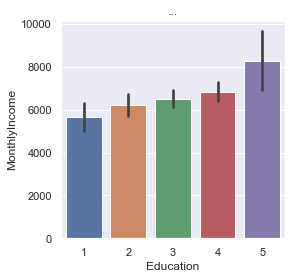

In [29]:
plt.figure(figsize=(4,4))
plt.title('...')
sns.barplot(x=df['Education'],y=df['MonthlyIncome'])

## 3. What is the effect of age on attrition?

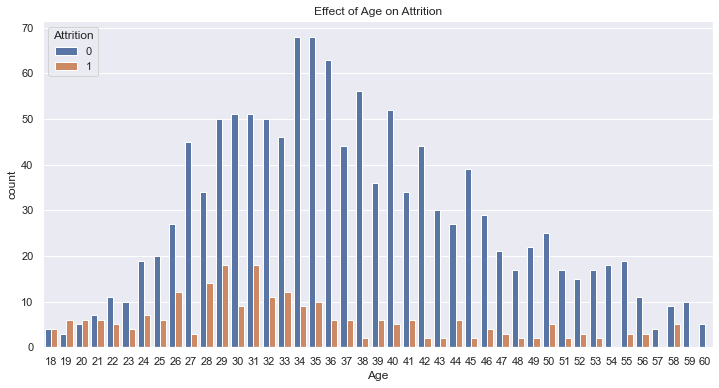

In [36]:
plt.figure(figsize=[12,6])
sns.countplot(x ='Age', hue = "Attrition", data = df)
# Show the plot
plt.title("Effect of Age on Attrition")
plt.show()

Most employees in the company fall within the age range of 25 years to 46 years.
Almost all age range seem to churn within the certain period except from employees aged 57,59 & 60.
Age has an effect on Attrition since employees from 28-35 seem to have higher churn rate.
The proportion of employees who left was comparatively less among the senior level employees.

## 4. Is Income the main factor in employee attrition?

No, TotalWorkingYears is the main factor in employee attrition.
We see that as the working years of employees increases, Attrition decreases and as the working years of employees decreases, Attrition increases. Less experienced employees comprise of a higher proportion of employees leaving the company. Employees of younger age and with less working years tend to relocate to other jobs.

But Income is also a main factor in employee attrition.

Below is a chart showing the effect of Total working years on Attrition.

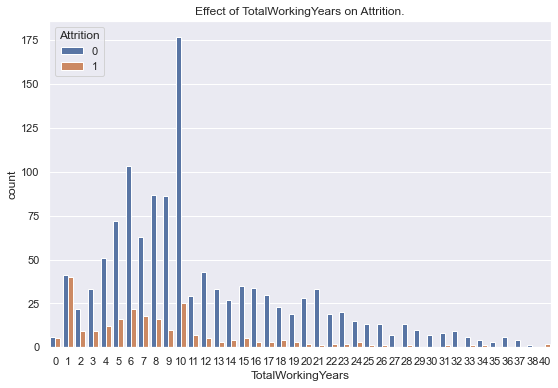

In [37]:
plt.figure(figsize=[9,6])
sns.countplot(x ='TotalWorkingYears', hue = "Attrition", data = df)
plt.title("Effect of TotalWorkingYears on Attrition.")
# Show the plot
plt.show()

## 5. How does work-life balance impact the overall attrition rate?

In [24]:
# Attrition rate = (No. of separations / Avg. No. of employees) x 100.

len(df[df.Attrition=='Yes'])/len(df)*100

16.122448979591837

This can be considered as low attrition since it falls below 20%.

### Checking for how work-life balance impact the overall attrition rate

In [19]:
mat = np.corrcoef(df['Attrition'], df['WorkLifeBalance'])
print(mat)

[[ 1.         -0.06393905]
 [-0.06393905  1.        ]]


Work-life balance is negatively related to turnover intention. Where the values of one variable tend to increase when the values of the other variable decrease. So as WorkLifeBalance increases, Attrition decreases. WorkLifeBalance doen't exactly impact in the overall attrition rate.

In [39]:
import statistics
statistics.mean(df.WorkLifeBalance), statistics.mean(df.Attrition)

(2.7612244897959184, 0.16122448979591836)